# K Nearest Neighbors Applied to Fisher Iris Data Classification

By: William Duquette

Date: 1/26/2023

K Nearest Neighbors is a supervised machine-learning algorithm. This algorithm is typically used for regression and classification. Today we will be using KNN for classification. We will be working with the famous Fisher Iris data set.

Let us say that we are trying to classify point A. KNN will "ask" the k nearest points to A what classification A should have. We will determine which points are closest using a distance measurement (more on this later).

The goal of this analysis is straightforward. We hope to pick a k (k nearest points that will vote on what a value should be) that will allow our model to label data accurately. We want to pick a k that provides the smallest generalization error. When we say generalization error, we want to know the error rate of our model on the test set. We test this because we want to know how well our model works on data it has not directly seen; in other words, we want to know if our model generalizes well to data it has not seen, as opposed to memorizing the data it has seen.

More broadly, we are trying to see if K Nearest Neighbors is a promising approach for the Fisher Iris Data Set.

In [ ]:
# Import Necessary Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets   #only for the purposes of loading the iris dataset
import seaborn as sn
from statistics import mean

## Import Data

The first step is importing the data. This data set is imported through sklearn. As mentioned previously, this data set is hugely famous and commonly used for machine learning experiments. Once the data is imported, it is put in the format of a Pandas Data Frame.

In [ ]:
# We load the Fisher Iris Dataset from the sklearn toolbox
iris_data = datasets.load_iris()
print(type(iris_data))
print(iris_data)

<class 'sklearn.utils.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
    

In [ ]:
# We create a pandas dataframe to hold the Fisher Iris Data
# The dataframe is called "rawdata"
rawdata = pd.DataFrame({
    "sepal_length" : iris_data.data[:,0],
    "sepal_width" : iris_data.data[:,1],
    "petal_length" : iris_data.data[:,2],
    "petal_width" : iris_data.data[:,3],
    "label" : iris_data.target
})

print(rawdata)

     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


Once we have the data in a format we like, we can begin to get some very early descriptions of the data set. To start, we use the .info() command to check if the features have the same amount of entries. Additionally, we can see the head of the data (the first four rows in this case). Before moving any further, we should check that the data has the same amount of classifications for each label. This can be quickly done with the value_counts() command. As can be seen below, there is an even distribution of labels.

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
rawdata.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
rawdata["label"].value_counts() #We know that there is an even distribution of the classes

0    50
1    50
2    50
Name: label, dtype: int64

## Clean/Transform Data

- The first thing we need to do is check if any cleaning or transformation is needed. Of course, these things should not be done without thought as it increases the risk of adding human bias to the problem. However, some sort of feature scaling is necessary in this case, given that many features have very different ranges. This can be seen in the boxplot below:

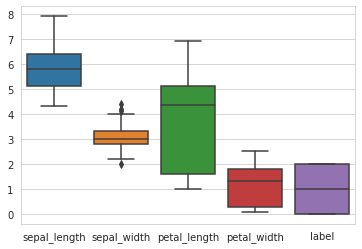

In [ ]:
sn.set_style("whitegrid")
sn.boxplot(data = rawdata)

Because of the different ranges, we need to conduct feature scaling. Either standardization or normalization would have been appropriate in this context. However, we chose to do standardization because standardization is less susceptible to outliers. Below is a function named standardizer used to standardize the data. Once that function is described, we use it to standardize the data. The results can be seen within the first four rows of the newly standardized data set. Notice the change in values. With the newly scaled data, we can continue with our experiment.

- A quick note on standardization: To standardize a value, you must subtract by the mean and divide by the standard deviation.

In [ ]:
def standardizer(df, attributes):
  """
Author: William Duquette

The function takes a dataset and standardizes the listed attributes
PARAMETERS:
df - a pandas dataframe
The columns are attributes and the rows are samples.

attributres -  a list of the attributres within the given pandas df that you would like to standardize

RETURN VALUE: dfTrain, dfTest
The function has no return value. This function edits the pandas dataframe that is entered and standardizes the columns that are entered
  """

  # Feature Scaling: Using standardization because variables are on different scales
  for attr in attributes:
    df[attr] = (df[attr] - df[attr].mean())/df[attr].std()

In [ ]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

standardizer(rawdata, attributes) #Standardize the desired columns
rawdata.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0


In [ ]:
rawdata.describe() # Short describtion of the data

,sepal_length,sepal_width,petal_length,petal_width,label
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-5.684342e-16,-7.815970e-16,-2.842171e-16,-3.789561e-16,1.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.819232
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00,0.000000
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00,0.000000
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01,1.000000
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01,2.000000
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00,2.000000


## Construct Train, Validation, and Test Set

Before continuing, we need to construct a validation, training, and test set. This must be done before any in-depth data analysis is done because not doing so could allow you to fit the data to the test set, which is forbidden.

So three sets are made: training set, testing set, and validation set. The split that we will use in this case is 60:20:20. So, 60% of the data is used for training, 20% is used for validation, and 20% is used for testing.

This is a small data set, with only 150 observations. As a result, it can be challenging to work with because of its small size. Typically with larger data sets, one would ideally like a 50:25:25 split of the data, but since our data is of such small sizes, we have to do a 60:25:25. Although we have limited data, the validation is still crucial as we are training our data in the sense that we are attempting to find the optimal value for k. So we must not use our testing data during the training process of our model.

Below is a function that will break up the data into the three categories discussed above. This function randomizes the data and breaks up the data into the desired percentages but does so in a way that maintains the distribution of the labels. For example, let us say that we are working with fish identification. Say that 32% of our training data is sea bass, 42% is salmon, and the remaining 26% is tuna. If that is the case, when this function creates the test and validation set, both will have 26% sea bass, 42% salmon, and the remaining 26% tuna.

Note: This function modifies the function written by Dr. Kretchmar.

In [ ]:
def buildTrainTestValidSet (df, percentTest = 0.2, percentValid = 0.2):
  '''
Author: Will Duquette
Note: Built on the work of Dr.Kretchmar

The function takes a dataset and helps break it into a testing set,
validation set, and training set.

PARAMETERS:
df - a pandas dataframe with one column named "label" which
is the target output category.
The columns are attributes and the rows are samples.

percentTest - a percentage between 0 and 1 which indicates how
much of the data should be used for the test set

percentValid - a percentage between 0 and 1 which indicates how
much of the data should be used for the valid test

RETURN VALUE: dfTrain, dfTest, dfValid

The function will return three pandas dataframes which will have
the same class distribution as the input dataframe. The data frame
that is inputed is partitioned in such a way that that "percentTest"%
of the rows are randomly selected from the original dataframe. The data
frame that is inputed is partitioned  in such a way that the "percentValid"%
of the rows are randomly selected from the original dataframe. The remainder
of the data (1-percentTest - percentValid)% is allocated to the training
set.

The input dataframe is sorted by the target columns and the percentage
is taken from each category, which means that the testing set, validation
set, and the training set will all have approximately the same percentage
of samples with each label value.
  '''

  # initialize dfTest, dfValid, and dfTrain to None
  dfTest = None
  dfTrain = None
  dfValid = None

  # find unique labels and sort dataset by labels
  vals = df.label.unique()
  df2 = df.sort_values(by=['label'])

  # for each label, we will select percent of the rows for testing,
  # keep the rest for training
  for val in vals:
    # get subset of rows with this label val
    df3 = df2.loc[df2['label'] == val]
    count = len(df3)
    # random permutation of all these row indices
    shuffle = np.random.permutation(count)
    # select set of indices for test set rows
    # validation set rows and training set rows
    testIndices = shuffle[0:int(count*percentTest)]
    lenTest = len(testIndices)
    validIndices = shuffle[int(count*percentTest):(int(count*percentValid) + lenTest)]
    trainIndices = shuffle[(int(count*percentValid) + lenTest):]


    testSetTemp = df3.iloc[testIndices]
    trainSetTemp = df3.iloc[trainIndices]
    validSetTemp = df3.iloc[validIndices]

    # append and build test, validation, and training sets
    if dfTest is None:
      dfTest = testSetTemp
      dfTrain = trainSetTemp
      dfValid = validSetTemp
    else:
      dfTest = dfTest.append(testSetTemp)
      dfTrain = dfTrain.append(trainSetTemp)
      dfValid = dfValid.append(validSetTemp)

  return dfTrain, dfTest, dfValid

First, we have to run our function, but once that is done, we can confirm that the data has been split up properly. You can see below that each set has the same number of each label, and you can also see the head of each dataset.

In [ ]:
trainset, testset, validset = buildTrainTestValidSet(rawdata, 0.2, 0.2) #60:20:20 split because data size is small

In [ ]:
trainset["label"].value_counts() #We know that there is an even distribution of the classes

0    30
1    30
2    30
Name: label, dtype: int64

In [ ]:
validset["label"].value_counts() #We know that there is an even distribution of the classes

0    10
1    10
2    10
Name: label, dtype: int64

In [ ]:
testset["label"].value_counts() #We know that there is an even distribution of the classes

0    10
1    10
2    10
Name: label, dtype: int64

In [ ]:
trainset.head()

,sepal_length,sepal_width,petal_length,petal_width,label
33,-0.414621,2.621599,-1.335752,-1.311052,0
14,-0.052331,2.162743,-1.449047,-1.311052,0
43,-1.018437,1.015602,-1.222456,-0.786281,0
23,-0.897674,0.556746,-1.165809,-0.917474,0
38,-1.743017,-0.131539,-1.392399,-1.311052,0


In [ ]:
testset.tail()

,sepal_length,sepal_width,petal_length,petal_width,label
141,1.276066,0.097889,0.760211,1.443994,2
131,2.483699,1.703886,1.496631,1.050416,2
111,0.672249,-0.819823,0.873507,0.919223,2
108,1.034539,-1.278680,1.156745,0.788031,2
123,0.551486,-0.819823,0.646916,0.788031,2


In [ ]:
validset.head()

,sepal_length,sepal_width,petal_length,petal_width,label
24,-1.259964,0.786174,-1.052513,-1.311052,0
41,-1.622254,-1.737536,-1.392399,-1.179859,0
11,-1.259964,0.786174,-1.222456,-1.311052,0
31,-0.535384,0.786174,-1.279104,-1.048667,0
19,-0.897674,1.703886,-1.279104,-1.179859,0


## Preliminary Data Exploration

Now that we have separated our data, we can begin analyzing and constructing our data. To begin, we want to see the distribution of each variable. Additionally, we would like to see visually how the variables relate to each other. We can do both things by using the scatter_matrix function within Pandas.

Within the below scatter matrix, we can make several observations. First, along the diagonal, we can see the distribution of each variable. Again, nothing is shocking on this front. Next, notice the bottom left "histogram." This plot is the distribution of the labels, and we look at that to confirm that the data is evenly distributed. Next, we can see the relationship between all the variables. Although not directly necessary to this project, getting a better understanding of your data is always helpful.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14e260d0>,
      dtype=object)

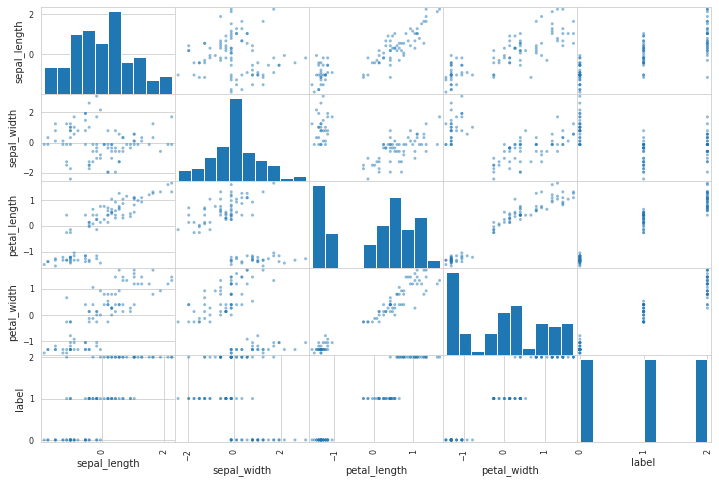

In [ ]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"]

scatter_matrix(trainset[attributes], figsize = (12,8)) #scatter matrix

In the same vein as above, we can make a correlation matrix. This is done using the .corr() function. After this calculation, we can create a correlation matrix using seaborn (a plotting library in python). This is helpful because it allows us to see the relationship between values in a more concrete sense. A simple example to help understand correlation: Let us say that A and B are highly positively correlated. That means that as A increases/decreases, so does B. Conversely, A and B are negatively correlated, which means that B does the opposite as A increases/decreases. Below we can see the correlation matrix for the training data set.

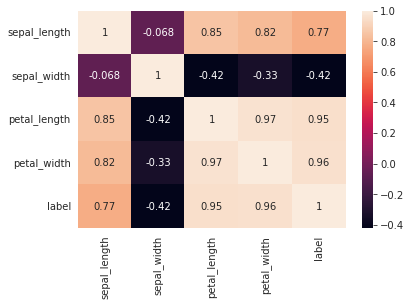

In [ ]:
corrMatrix = trainset.corr(method = "pearson")
sn.heatmap(corrMatrix, annot = True) #correlation matrix using seaborn
plt.show()

## Define Model

Now it is time to define our model. As previously mentioned, this is a KNN (K-Nearest Neighbors) model. This is a relatively simple algorithm. This function takes three inputs. The parameters are as follows: First, k, which is the number of neighbors you would like to vote on the classification of a point. Second, data is the data that we are going to be using to train the model. Third, inputs are the sets that contain the targets. In most of our cases, this is either the test set or the validation set

As previously mentioned in the introduction, the approach KNN takes is to ask the k nearest neighbors to a point what classification this point should be. The concept of distance is crucial to the execution of this algorithm. Distance is used to decide which are k closest points to a specific point. Using a distance formula, the function below provides a list of the k nearest points to the point we are trying to find a classification for. We can then use this information to determine which classification we should use for the new point.

In [ ]:
def knn(k,df,inputs):

  '''
Inspired by code from  Stephan Marsland

Author: William Duquette

The function takes in a value k, a data frame, and an input and fits a KNN model
to the data.

PARAMETERS:
k - the number of neighbors you would like to be used to classify a data point

df - the data frame that is used to build our model or the training data

inputs - the inputs for our model or the so called testing data

RETURN VALUE: prediction for data points that are inputted, we are able to run tests against this data

The function below is the KNN function. We use this algorithm to determine the closest
points to the point we are trying to classify. This code takes in a data frame
and inputs, both of which are converted to numpy arrays. Once we have numpy arrays
we are able to start the process of the finding the k nearest neighbors
  '''

  data = df.to_numpy()
  newInputs = inputs.to_numpy()

  #Clean data and prepare data for KNN implimentation
  dataC = [int(label[4]) for label in data]
  updateData = [index[:4] for index in data]
  updateInput = [index[:4] for index in newInputs]

  updateData = np.array(updateData)
  updateInput = np.array(updateInput)
  dataC = np.array(dataC)

  nInputs = np.shape(inputs)[0]
  closest = np.zeros(nInputs)

  for n in range(nInputs):
    # Compute distances
    distances = np.sum((updateData-updateInput[n,:])**2,axis=1)

    # Identify the nearest neighbours
    indices = np.argsort(distances,axis=0)

    classes = np.unique(dataC[indices[:k]])

    if len(classes)==1:
      closest[n] = np.unique(classes)

    else:
      counts = np.zeros(max(classes)+1)
      for i in range(k):
        counts[dataC[indices[i]]] += 1

      closest[n] = np.argmax(counts)

  return closest

## Define Test Function

Below we have created a simple test function. This function computes the generalization error for our model. This model's basics are comparing two numpy arrays (model output v. test set). If the arrays are not different, then there is no generalization error. However, if the arrays are different, then this function will calculate the generalization error by counting the differences and dividing them by the size of the testing data. The results are multiplied by 100, so they may be expressed as a percent.


Note: This function works on either the test or validation sets.

In [ ]:
def testfunction(modelOutput, test):
  '''
Author: William Duquette

The function takes a models output and a data set that contains the targets
that you are hoping to test against. Note: This works for either a test or
validation set.

PARAMETERS:
modelOutput - the model that is input, this model will include the value
of k that is chosen

test - this is the data set that you are choosing to test on. In this case
the test dataset must have the column "label"

RETURN VALUE: generalization error

The function returns the generalization error of a model. This is done by
counting the difference between the model predictions and the target values.
Once this value is counted it is divided by the length of the list containing
the models output data. Essentially, we are computing the percent that is
different. The final value is multiplied by 100 so that it can expressed
as a percent.
  '''

  error = 0
  testS = test["label"].to_numpy() #convert target column to numpy array
  if np.array_equal(testS.all(), modelOutput): #checks if array is equal
    # print("Model's generalization error: 0%")
    return 0
  else: #if array is not equal must iterate through to find how many different
        # are present
    for i in range(len(modelOutput)): #iterate through length of model output
      if np.array_equal(testS[i], modelOutput[i]): #compare the elements of each list at specific index and if
                                                   # different increase error
        continue
      error += 1

    return (error/len(testS) * 100) #output generalization error
    #print("Model's generalization error: " + str((error/len(testS) * 100)) + "%")

## Define Optimization Function

This is the so-called training of the model. We iterate through 10 possible values of k (1,2,3,4,5,6,7,8,9, or 10). Anything over ten would be too high and impractical

Note that the test set can be anything desired. In our case, we will use this function with the validation set, as this is part of our training process, and therefore the test set cannot be used). The function computes the generalization error on the entered validation set, which is done for each possible value of k. The results are stored in an array, then the minimum generalization error is found, and its corresponding k value is returned. Note: This function selects the lowest value of k possible, so if both k = 2 and k = 3 are tied for the lowest generalization error, and both have generalization errors of 2%, then the model will select k = 2. This function also outputs a plot that shows how our model performs on the validation set across the possible values of k.

Note: This function uses the test function that we have defined above.

In [ ]:
def paramOpt(trainset, test, plot = True):

  '''
Author: William Duquette

The function takes in a training set, and a test set (Note: this function
works on a validation set, and is in fact frequently on run with a validation
set rather than a test set) and trains the model until the optimal value of k
is found. Note: it is strongly reccomended that this be done on a validation
data

PARAMETERS:
trainset - the data that the model will be trained on

test - the data that you will be used to test the model. As mentioned above
this function works both on a validation or test set.

plot - the function can output a plot to visualize the results of the training
process. The x axis is the iterations of the models parameters (in the case of
KNN: k), and the y axis is the generalization error. The default value is set
to true

RETURN VALUE: the value of k with the lowest generalization error on the validation
or test set (in this case we will use the validation set with this example)

The function returns the k with the lowest generalization error on the validation
or test set. The function tests all the values of k betwen 1 and 10 and computes
the generalization error for each value of k. Note: to reiterate it is strongly
reccomended that this be done on a validation data as this is part of the training
process.
  '''

  # initialize both lists
  results = []
  kList = []

  results.append(float("inf")) #append largest number possible to first value. Since
                               # k is from 1 to 10 there is no entry for zero, so that
                               # spot in the results must be filled with a value that
                               # does not interfere with algorithm

  #for k in range(1, len(trainset["label"])): # if more iterations are desired, but not reccomended
  for k in range(1, 11): #Anything more than 10 would be to high
    kList.append(k) # append all values of k test
    results.append(testfunction(knn(k, trainset, test), test)) #compute generalization error and append to list

  minVal = min(results) # find lowest generalization error
  minId = results.index(minVal) # find corresponding k

  # plot is meant to show training process
  if plot == True:
    plt.style.use('fivethirtyeight')
    plt.plot(kList, results[1:])
    #plt.axis([0, len(kList) + 5, 0, max(results[1:]) + 5]) # if more iterations are desired, but not reccomended
    plt.axis([0, len(kList) + 1, 0, max(results[1:]) + 5])
    plt.xlabel("K")
    plt.ylabel("Generalization Error")
    plt.title("K vs Generalization Error\n(Validation Set)")
    plt.show()

  return minId

## Define Function that Creates Model

Below is a function that creates our KNN. We use both of the functions defined and described above. First, we use the parameter Optimization function to find the optimized value of k (we use the validation set in our paramOpt function as this is part of the training process). Once this is done, we compute the generalization error on the test set. This will allow us to see how well our model performs on data it has not seen.

In [ ]:
def createKNN(trainset, testset, validset, plot = True):
  '''
The function takes in a trainset, testset, and validation set.
This function creates your KNN model. It runs both the optimization
function to find the optimal value of k for the data you are working with,
hence the need for the validationset, and it tests the function of the test
set. A plot is produced to visualize training process.

To summarize: this function creates, trains, and tests a KNN model

PARAMETERS:
trainset - the data that the model will be trained on

test set - the data that will be used to test the model.

validation set - the data that will be used to test the model during the training
process

plot - the function can output a plot to visualize the results of the training
process. The x axis is the iterations of the models parameters (in the case of
KNN: k), and the y axis is the generalization error. The default value is set
to true

RETURN VALUE: the value of k with the lowest generalization error and the generalization
error of the model

The function runs an optimization function that uses the validation set to find the
best value of k and then computes the generalization error on the testing set
  '''
  optK = paramOpt(trainset, validset, plot) # run optimization function for k

  return optK, testfunction(knn(optK, trainset, testset), testset) #return optimized value and generalization error on test set

## Create Model

Here we create our model. First, we call the above function, which intern calls paramOpt and our testfunction. Along with the plot, the code block outputs a formatted statement that alerts you to the optimized value of k, and the generalization error observed using this value of k on the test set.

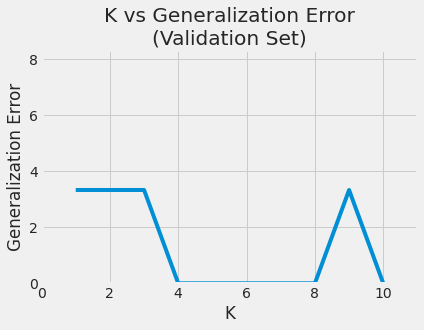

The optimal value of K is 4. The generalization error of the model (compared to test set) is 6.666666666666667.


In [ ]:
model = createKNN(trainset, testset, validset, True)

print("The optimal value of K is " + str(model[0]) + ". The generalization error of the model (compared to test set) is " + str(model[1]) + ".")

Although the data will be different every time we run the notebook, we can make comments about the general trend that you can see if you run all the code up to this point repeatedly. Granted, there is some variance, but if run enough times, it will be apparent that the Fisher Iris Data set is not very sensitive to the value chosen for k. Furthermore, when conducting sensitivity analysis, you will frequently find that the generalization error does not decrease past a certain value of k, meaning that the generalization error seems to level out. As previously mentioned, this would suggest that the Fisher Iris Data set is not particularly sensitive to the value of k chosen. More frequently than not, the training process chose a small value of k, frequently between 1 and 3 and most of the time under 5.

Although the function (tVarModel) below is not entirely for this purpose, you can set the plot to true in createKNN. However, be careful with this; tVarModel () contains a for loop for simulation purposes, and if the for loop within the function iterates 100 times, you will have 100 plots to look at.

A topic worth noting is how accurate this model is. Although a generalization error rate of 6.67% (you will sometimes see higher or lower, but this is a consistent value) might not seem exceptionally high, it is essential to keep in mind that we are working on a small data set. There is a concern that if we were to somehow work with another Fisher Iris data set (say, ten times bigger than the current data set), we would see more significant errors. It is hard to know whether this will be the case, but it is worth keeping in mind.

## Experimentation to Determine if Model has High Variance

We want to test our model's variance. What do we mean when we talk about variance? In this case, we wonder if the same value of k is picked if we break up the data differently. Remember, the data is broken up randomly, so it stands to reason that if we broke up the data again, we would see different observations in the test, train, and validation sets. Another way of putting this is: that we want to check the reproducibility of our model. Will we always pick the same value of k?

The below function seeks to answer this question. This function breaks up the raw but standardized data 50 different times. Since the buildTrainTestValidSet function randomly shuffles the data, it is improbable that the shuffles will be the same. Then we call createKNN, which will intern call paramOpt. Like above, createKNN finds our optimized value of k and then will find the generalization error when computed on their respective test sets. This process is conducted 50 times, and the value of k and the generalization error for each iteration's computation and data. These values (k and generalization error) are stored in an array. These arrays are then used to create a data frame that stores the results of our experiment. Additionally, we create a histogram that shows which value of k has been picked and how frequently.

In [ ]:
def tVarModel(rawData):
  '''
The function takes in raw data and outputs a histogram that shows the result
of i training and testing sessions. The function outputs a distribution of
the k values that are chosen for each partition of data tested. A more thourough
description can be found below. This function is meant to test the variance of the model

PARAMETERS:
raw data - the rawdata that will be used to train a model. This data will be split
up into training, testing, and a validation set.

 and then the previously defined functions (discussed above) will be used to train i different models on i different
data sets to test the variance of the model

RETURN VALUE: A histogram that shows the variance of the model

The function returns a histogram that shows how much variance the model has. It shows this
by allowing us to see if the same k is chosen each time. As mentioned only raw data is
inputed into this model. Then the function calls buildTrainTestValid() which constructs
random train, test, and validation sets. We do this so we can see how the model performs
with slightly different subset of data each time. We run createKNN() so that we are able to
to create a model and see what value of k is chosen. Again this is to test the variance of
the model. We store all the values of k chosen, and create a histogram so that we can see
if the same value of k is chosen each time. We also compute the average generalization error
for each value of k chosen.

Note: this function assumes that any cleaning/transforming, or scaling is already done to
the raw data
  '''

  finalK = []
  gE = []
  for i in range(200): # set to desired number of iterations
    trainset, testset, validset = buildTrainTestValidSet(rawdata, 0.2, 0.2) #60:20:20 split because data size is small
    k, gError = createKNN(trainset, testset, validset, False) # can change false to true to see plots for each iteration

    #Append results ok and generalization error
    finalK.append(k)
    gE.append(gError)

  setK = set(finalK) # eliminate repitions of k
  resultD = {}

  # iterate through lists to add every instance of a certians k generalization error to new list
  # to keep track of the generalization error for each k
  for k in setK:
    resultD[k] = []
    for element in finalK:
      if k == element:
        resultD[k].append(gE[element])
    if resultD[k] == []:
      del resultD[k]

  # find the average generalization error for each k
  toPD = {}
  for key in resultD:
    toPD[key] = [mean(resultD[key])]

  # Count all instances of each k in the array
  countArray = []
  for k in setK:
    countArray.append(finalK.count(k))

  # create pandas data frame
  df = pd.DataFrame.from_dict(toPD).transpose()

  #add count array to data frame and prepare data frame to outputed
  df[""] = countArray
  df.reset_index(inplace=True)
  df.columns = ["K", "Avg GE", "Count"]

  # create histogram
  plt.style.use('fivethirtyeight')
  plt.hist(finalK, bins = len(setK))
  plt.xlabel("K")
  plt.ylabel("Frequency")
  plt.title("Distribution of Optimized Ks")
  plt.show()

  return df # return data frame


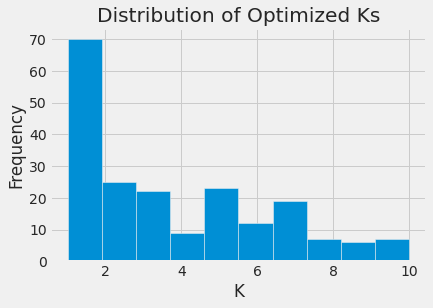

,K,Avg GE,Count
0,1,0.000000,70
1,2,6.666667,25
2,3,0.000000,22
3,4,6.666667,9
4,5,6.666667,23
5,6,3.333333,12
6,7,10.000000,19
7,8,0.000000,7
8,9,3.333333,6
9,10,6.666667,7


In [ ]:
KVar = tVarModel(rawdata)
KVar

Before these results are discussed, it is worth mentioning that it is improbable that the same results are reached twice, given that the data is randomized each time before being trained on.

We can see that smaller numbers of k are frequently chosen. As was mentioned above, the algorithm chooses the smallest value of k possible so that the model may remain as simple as possible. We can also see from the previous discussion that the models tend to see the generalization errors level out, and the value of k is frequently minimal. Finally, we see that the algorithm written, more often than not, chooses small values of k, which would appear to suggest that our algorithm is relatively consistent, which means that our algorithm has relatively low variance.

## Conclusion

K Nearest Neighbors appears to have some trade-offs. There are some benefits and drawbacks. First, the model appears to have a relatively low generalization error rate for the chosen ks. However, as previously mentioned, there could be some concern over how this error rate would scale to more extensive versions (if one did exist) of our data set. However, since we are working with a relatively small data set, we expect more errors than if we had a more significant data set to train on.

Second, the model appears to be relatively consistent (low variance). This is something that should be taken into account. Serious concerns would be raised if the model was not consistent because an algorithm with high variance will provide different results on different iterations if the data is randomly shuffled, which in our case, it is. So it is encouraging to see that the model seems to have relatively low variance, which means that we can trust that our model will work as it does now for different subsets of data as our training data.

Overall, we would argue that this model is acceptable. There are some concerns, but it appears to work relatively well. Working with small data sets can be difficult and does not allow much data for both training and testing. This is something that should be taken into account when deciding what algorithm should be used.

To conclude, each user of KNN needs to consider trade-offs, especially when working with smaller data sets. Nevertheless, the model we created in this notebook is acceptable for the data size we are working with.